In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [7]:
exercise=pd.read_csv('exercise.csv')
calories=pd.read_csv("calories.csv")

In [8]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [9]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
df = exercise.merge(calories,on='User_ID')

In [11]:
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0


<Axes: xlabel='count', ylabel='Gender'>

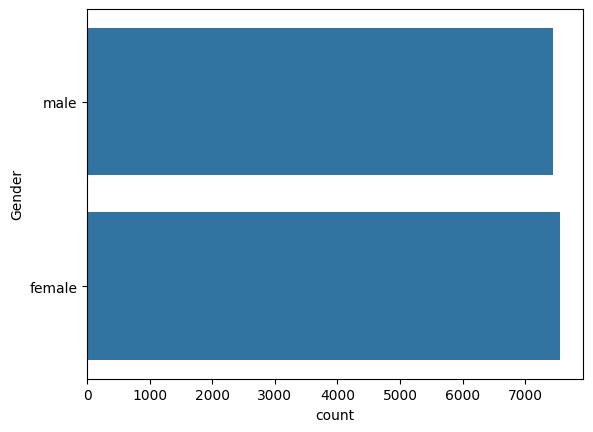

In [12]:
sns.countplot(df['Gender'])

In [13]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

(array([1498., 1272., 1238., 1043.,  975.,  889.,  847.,  759.,  725.,
         650.,  642.,  622.,  549.,  551.,  538.,  478.,  449.,  467.,
         398.,  410.]),
 array([20.  , 22.95, 25.9 , 28.85, 31.8 , 34.75, 37.7 , 40.65, 43.6 ,
        46.55, 49.5 , 52.45, 55.4 , 58.35, 61.3 , 64.25, 67.2 , 70.15,
        73.1 , 76.05, 79.  ]),
 <BarContainer object of 20 artists>)

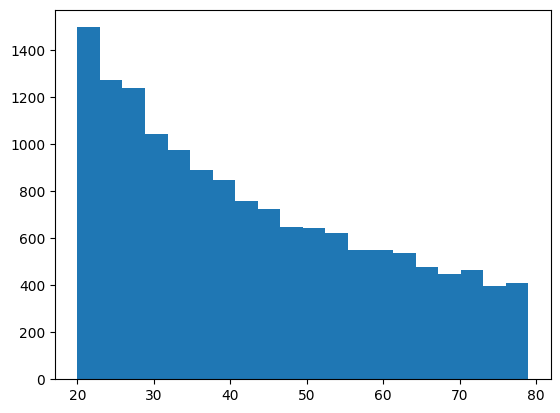

In [14]:
plt.hist(df['Age'],bins=20)

<Axes: xlabel='Duration', ylabel='Calories'>

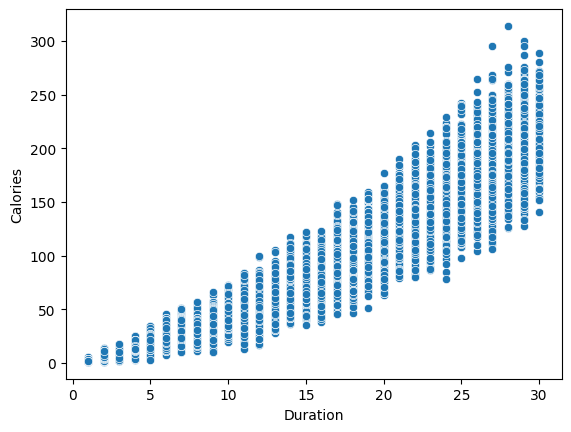

In [15]:
sns.scatterplot(x=df["Duration"],y=df['Calories'])

<Axes: xlabel='Gender', ylabel='Duration'>

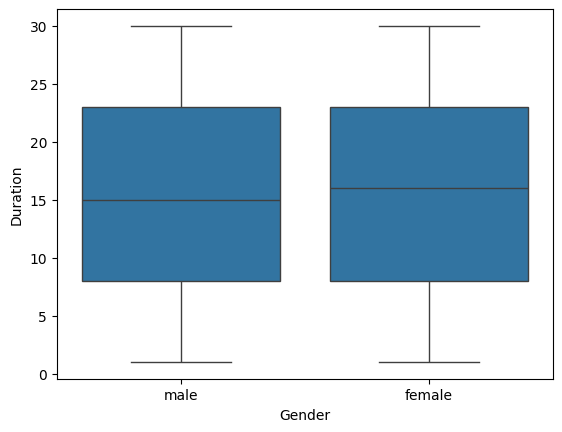

In [16]:
sns.boxplot(x='Gender' , y='Duration',data =df)

In [17]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [18]:

# sns.displot(df[])


<Axes: xlabel='Age', ylabel='Calories'>

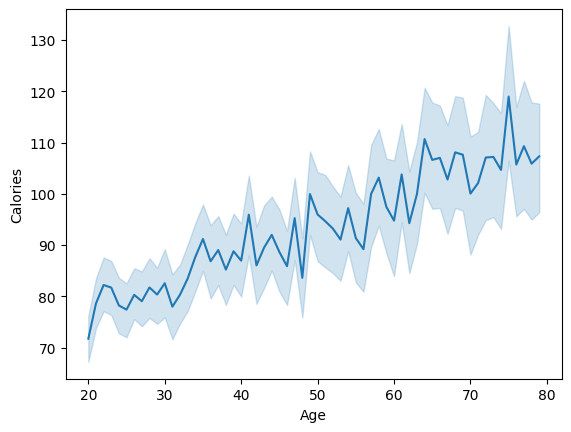

In [19]:
sns.lineplot(x=df["Age"],y=df['Calories'])


#Encoding

In [20]:
df["Gender"]= df["Gender"].map({"male":1, "female":0})

In [21]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [22]:
X =df.drop(["User_ID","Calories"],axis=1)
y=df["Calories"]

In [23]:
X.shape

(15000, 7)

In [24]:
y.shape

(15000,)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(12000, 7)

In [28]:
 X_test.shape

(3000, 7)

In [29]:
#Tranining Model

In [30]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
models={
    'lr':LinearRegression(),
    'rd':Ridge(),
    'ls':Lasso(),
    'dtr':DecisionTreeRegressor(),
    'rft':RandomForestRegressor()
}

In [32]:
for name,mod in models.items():
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)

    print(f"{name} MSE: {mean_squared_error(y_test,y_pred)}, Score: {r2_score(y_test,y_pred)}")

lr MSE: 131.99574575081704, Score: 0.9672937151257295
rd MSE: 131.9962590313935, Score: 0.9672935879435945
ls MSE: 143.82689461175073, Score: 0.9643621590908396
dtr MSE: 28.277, Score: 0.9929934437498034
rft MSE: 7.1242003, Score: 0.9982347451943411


#Selecting models

In [33]:
rft= RandomForestRegressor()
rft.fit(X_train,y_train)
y_pred = mod.predict(X_test)

In [34]:
import pickle
pickle.dump(rft,open("rfr.pkl","wb"))

In [37]:
X_train.to_csv("X_train.csv")